# Εργαστήριο 2

Πύλες 1-,2- και 3-qubit. Εύρεση κβαντικών καταστάσεων με `statevector_simulator`.
Σύνδεση στο quantum computing cloud της IBM.

## Ασκήσεις

Φορτώστε τη βιβλιοθήκη Qiskit σε ένα καινούργιο jupyter-notebook ή αρχείο python και δουλέψτε τις παρακάτω ασκήσεις.

### Άσκηση 2.1

Υλοποιήστε τα παρακάτω κυκλώματα.

![a](img/lab2/lab2.1a.png)

![b](img/lab2/lab2.1b.png)

![c](img/lab2/lab2.1c.png)

![d](img/lab2/lab2.1d.png)

![e](img/lab2/lab2.1e.png)


### Άσκηση 2.2

Αποδείξτε ότι μια γενική πύλη `u3` είναι μοναδιαία.

Υπολογίστε τις παραμέτρους που χρειάζεται η πύλη `u3` για να δώσει τις πύλες X, Y, Z, H, S, T.
Αν θέλετε, χρησιμοποιήστε τις πύλες `u1` ή `u2` αντί της `u3`, όταν αυτό γίνεται.

### Άσκηση 2.3

Δημιουργήστε απλά κυκλώματα 1-qubit για κάθε μία από τις πύλες Y, Z, S, T. Φροντίστε η δράση του κυκλώματος να μην είναι τετριμένη· δηλαδή να μην ειναι η τελική κατάσταση ίδια με την αρχική.

Χρησιμοποιήστε το `get_backend("statevector_simulator")` για να επιβεβαιώσετε τη δράση των πυλών.

Είναι δυνατόν να υπολογίσετε την **πλήρη** δράση μιας άγνωστης πύλης με αυτόν τον τρόπο;

### Άσκηση 2.4

Βρείτε τη δράση των παρακάτω κυκλωμάτων με πειράματα ή υπολογισμούς και προσπαθήστε να τα απλοποιήσετε.

![a](img/lab2/lab2.4a.png)

![b](img/lab2/lab2.4b.png)

![c](img/lab2/lab2.4c.png)

![d](img/lab2/lab2.4d.png)

### Άσκηση 2.5

Συνδεθείτε στον λογαριασμό σας στην IBM και εκτελέστε το παρακάτω πείραμα με backend `ibmq_qasm_simulator`.

![](img/lab2/lab2.5.png)

### Άσκηση 2.6

Υπολογίστε τη δράση του παρακάτω κυκλώματος θεωρώντας το πρώτο qubit, μετά τη δράση της `u3`, ως μια άγνωστη γενική κατάσταση $a\left|0\right> + b\left|1\right>$.

![what](img/lab2/tcirc.png)

Βάλτε παραμέτρους της επιλογής σας στην πύλη `u3` και επιβεβαιώστε τους υπολογισμούς σας τρέχοντας πειραμα με backend το `ibmq_qasm_simulator`.



# Παραδείγματα

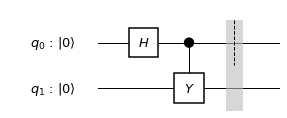

In [4]:
import qiskit as qlib

qr = qlib.QuantumRegister(2, 'q')
circ = qlib.QuantumCircuit(qr)
circ.h(qr[0])
circ.cy(qr[0],qr[1])
circ.barrier()
circ.draw(output='mpl')

In [10]:
# Τελική κατάσταση του παραπάνω κυκλώματος

backend = qlib.BasicAer.get_backend('statevector_simulator')

result = qlib.execute(circ, backend).result()
state = result.get_statevector(circ)
print(state)

[0.70710678+0.j         0.        +0.j         0.        +0.j
 0.        +0.70710678j]


## Σημειώσεις

## 1

Μερικές από τις κοινά χρησιμοποιούμενες πύλες:

### 1-qubit

**X, Y, Z, T, S, H**

Δηλώνονται αντίστοιχα (`circuit.`) `x`,`y`,`z`,`t`,`s`,`h`.

![1qubitgates](img/1qubit.png)

Η δράση τους στη βάση (0,1):

| f | X | Y | Z |
| -- | -- | -- | -- |
|$$
\begin{align}
\mathrm{f}\,\left|0\right> &\to \\
\mathrm{f}\,\left|1\right> &\to \\
\end{align}
$$|$$
\begin{align}
\left|1\right>\\\left|0\right>
\end{align}
$$|$$
\begin{align}
-i\left|1\right>\\i\left|0\right>
\end{align}
$$|$$
\begin{align}
\left|0\right>\\-\left|1\right>
\end{align}
$$|

| f | S | T | H |
| -- | -- | -- | -- |
|$$
\begin{align}
\mathrm{f}\,\left|0\right> &\to \\
\mathrm{f}\,\left|1\right> &\to \\
\end{align}
$$|$$
\begin{align}
\left|0\right>\\i\left|1\right>
\end{align}
$$|$$
\begin{align}
\left|0\right>\\e^{i\pi/4}\left|1\right>
\end{align}
$$|$$
\begin{align}
(\left|0\right> + \left|1\right>)/\sqrt{2}\\(\left|0\right> - \left|1\right>)/\sqrt{2}
\end{align}
$$|

### 2-qubit

Πύλη **SWAP** και πύλες **cU**, όπου **U** μπορεί να είναι οποιαδήποτε πύλη, πχ 
cX, cY, cZ κλπ.

Δηλώνονται με `circuit.swap` και `circuit.cx`, `circuit.cy` κλπ. όταν η U είναι μία από τις πύλες X,Y,Z,T,S,H.

|SWAP | cH | cZ | cY |
|--|--|--|--|
|![swap](img/swap.png)|![ch](img/ch.png)|![cz](img/cz.png)|![cy](img/cy.png)|


Η δράση τους στη βάση:

$$
\begin{align}
\mathrm{SWAP}\,\left|00\right> &= \left|00\right> \\
\mathrm{SWAP}\,\left|01\right> &= \left|10\right> \\
\mathrm{SWAP}\,\left|10\right> &= \left|01\right> \\
\mathrm{SWAP}\,\left|11\right> &= \left|11\right> \\
\end{align}
$$

$$
\begin{align}
\mathrm{cU}\,\left|00\right> &= \left|00\right> \\
\mathrm{cU}\,\left|01\right> &= \left|01\right> \\
\mathrm{cU}\,\left|10\right> &= \left|1\right>\,\otimes U\left|0\right> \\
\mathrm{cU}\,\left|11\right> &= \left|1\right>\, \otimes U\left|1\right> \\
\end{align}
$$


### 3-qubit

Πύλη **Toffoli**. Δηλώνεται με `circuit.ccx`.

![toffoli](img/toffoli.png)

$$
\begin{align}
\mathrm{ccx}\,\left|110\right> &= \left|111\right> \\
\mathrm{ccx}\,\left|111\right> &= \left|110\right> \\
\end{align}
$$

## 2

Η Qiskit μας δίνει γενικές πύλες 1-qubit από τις οποίες μπορούμε να δημιουργήσουμε άλλες πύλες.

Η γενικότερη είναι η  `u3(θ,φ,λ)`:

\begin{split}U_3(θ,φ,λ) = \begin{pmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2)
& e^{i\lambda+i\phi}\cos(\theta/2) \end{pmatrix}.\end{split}

Οι `u2` και `u1` είναι:

\begin{align*}
U_2(φ,λ) &= U_3(π/2,φ,λ)\\
U_1(λ) &= U_3(0,0,λ)
\end{align*}

## 3

Αντίστοιχο με το backend `qasm_simulator` που είδαμε, υπάρχει το `statevector_simulator` που μπορεί να μας επιστρέψει την **κβαντική** κατάσταση ενός
κυκλώματος. 

Το χρησιμοποιούμε ακριβώς όπως και το `qasm_simulator`:

```python
# Δηλώνουμε το backend στην αρχή του προγράμματός μας:
eng = BasicAer.get_backend('statevector_simulator')

# Ζητάμε την κατάσταση σε όποιο σημείο του κυκλώματος θέλουμε:
result = execute(circuit, eng).result()
state = result.get_statevector(circuit)
print(state)
```

## 4.α

Σύνδεση λογαριασμού στο quantum computing cloud της IBM:

1. Δημιουργία λογαριασμού [IBMQ](https://quantumexperience.ng.bluemix.net/)
2. Δημιουργία `API token` από το λογαριασμό (My Account > Advanced > API Token)
3. Αντιγραφή του `API token` και τρέξιμο του κώδικα:
```python
from qiskit import IBMQ
IBMQ.save_account('<paste API token εδώ>')
```

## 4.β

Χρήση λογαριασμού IBMQ:

```python
from qiskit import IBMQ
IBMQ.load_accounts()

## Επιλογή backend.
backend = IBMQ.get_backend('ibmq_qasm_simulator')
```

Προς το παρών θα το χρησιμοποιήσουμε ακριβώς όπως το αντίστοιχο Aer backend. Σωστότερη χρήση του online backend θα δούμε αργότερα.


## 5

Για παραδείγματα και λεπτομέρειες τις βιβλιοθήκης Qiskit μπορείτε να ανατρέχετε στο επίσημο documentation:

https://qiskit.org/documentation/overview.html